# Logistic Regression

Steps

 - Inspect the data
 - Draw plots and graphs using matplotlib
 - Romove zeros or repalce it by average
 - Feature scaling
 - Draw correaltion matrix
 - To handle correlation 
    - Feature selection
        - a. Try eliminating energy or loudness
        - b. Use combined value like average
- Type pf cllasification model
    - Logistics Regression
    - LDA - 613 and https://www.youtube.com/watch?v=IMfLXEOksGc
    - QDA
    - KNN
    - SVM (Also Check 613 book)
    - Kernel SVM
    - Naive Bayes
    - Decision Tree
    - Random Forest
    - ANN
    - Gradient Boosting
    - Bootstrap ??
    - Polynomial Regression?? (Also Check 613 book)
    - Ensemble Methods - Bagging, Boosting and Stacking
    - XGBoost, LightGBM, CatBoost
    - Parameter Tuning
        - Ridge 
        - Lasso
        - PCA
        - Partial Least Square

- Notes - 
    - Check what is confounding (613 book student and debt)
    

## Importing the libraries

In [140]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


import joblib
import pickle
import warnings
import graphviz
import pydotplus
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msn
from sklearn.svm import SVC
from skompiler import skompile
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier, export_graphviz, export_text
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, validation_curve
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, precision_score, f1_score, recall_score, roc_auc_score, confusion_matrix


## Importing the dataset

In [141]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [142]:
df = pd.read_csv(r'https://raw.githubusercontent.com/AnshulSGarg/Spotify-Genres-Classification-Model/main/spotify_songs.csv')

In [143]:
df.columns

Index(['track_id', 'track_name', 'track_artist', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms'],
      dtype='object')

In [144]:
df = df[['track_id', 'track_name', 'track_artist', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms','playlist_genre']]

In [145]:
classification_df = df[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms','playlist_genre']]

In [146]:
classification_array = classification_df.values

In [147]:
print("----------- column data type -----------")
print(classification_df.dtypes)


----------- column data type -----------
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
playlist_genre       object
dtype: object


In [148]:
classification_df.head()

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.748   0.916    6    -2.634     1       0.0583        0.1020   
1         0.726   0.815   11    -4.969     1       0.0373        0.0724   
2         0.675   0.931    1    -3.432     0       0.0742        0.0794   
3         0.718   0.930    7    -3.778     1       0.1020        0.0287   
4         0.650   0.833    1    -4.672     1       0.0359        0.0803   

   instrumentalness  liveness  valence    tempo  duration_ms playlist_genre  
0          0.000000    0.0653    0.518  122.036       194754            pop  
1          0.004210    0.3570    0.693   99.972       162600            pop  
2          0.000023    0.1100    0.613  124.008       176616            pop  
3          0.000009    0.2040    0.277  121.956       169093            pop  
4          0.000000    0.0833    0.725  123.976       189052            pop

In [149]:
print(classification_df.isnull().sum())

danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
playlist_genre      0
dtype: int64


There are null values but once we shortlist features we might not need to exclude rows with null value

In [150]:
classification_df.eq(0).sum()

danceability            1
energy                  0
key                  3454
loudness                0
mode                14259
speechiness             1
acousticness            1
instrumentalness    12089
liveness                1
valence                 1
tempo                   1
duration_ms             0
playlist_genre          0
dtype: int64

There are zeros values for some of the columns but in the context of the columns zero value makes sense. Therefore no need to exclude them. 

In [151]:
classification_df.groupby('duration_ms').count()

danceability  energy  key  loudness  mode  speechiness  \
duration_ms                                                           
4000                    1       1    1         1     1            1   
29493                   1       1    1         1     1            1   
31429                   1       1    1         1     1            1   
31875                   1       1    1         1     1            1   
31893                   1       1    1         1     1            1   
...                   ...     ...  ...       ...   ...          ...   
515960                  1       1    1         1     1            1   
516760                  1       1    1         1     1            1   
516893                  1       1    1         1     1            1   
517125                  2       2    2         2     2            2   
517810                  1       1    1         1     1            1   

             acousticness  instrumentalness  liveness  valence  tempo  \
duration_ms                                                             
4000                    1                 1         1        1      1   
29493                   1                 1         1        1      1   
31429                   1                 1         1        1      1   
31875                   1                 1         1        1      1   
31893                   1                 1         1        1      1   
...                   ...               ...       ...      ...    ...   
515960                  1                 1         1        1      1   
516760                  1                 1         1        1      1   
516893                  1                 1         1        1      1   
517125                  2                 2         2        2      2   
517810                  1                 1         1        1      1   

             playlist_genre  
duration_ms                  
4000                      1  
29493                     1  
31429                     1  
31875                     1  
31893                     1  
...                     ...  
515960                    1  
516760                    1  
516893                    1  
517125                    2  
517810                    1  

[19785 rows x 12 columns]

In [152]:
classification_df.iloc[:, -2].values

array([194754, 162600, 176616, ..., 210112, 367432, 337500], dtype=int64)

In [153]:
print("----------- QUANTILES -----------")
print(df.describe().T)    

----------- QUANTILES -----------
                    count           mean           std          min  \
track_popularity  32833.0      42.477081     24.984074     0.000000   
danceability      32833.0       0.654850      0.145085     0.000000   
energy            32833.0       0.698619      0.180910     0.000175   
key               32833.0       5.374471      3.611657     0.000000   
loudness          32833.0      -6.719499      2.988436   -46.448000   
mode              32833.0       0.565711      0.495671     0.000000   
speechiness       32833.0       0.107068      0.101314     0.000000   
acousticness      32833.0       0.175334      0.219633     0.000000   
instrumentalness  32833.0       0.084747      0.224230     0.000000   
liveness          32833.0       0.190176      0.154317     0.000000   
valence           32833.0       0.510561      0.233146     0.000000   
tempo             32833.0     120.881132     26.903624     0.000000   
duration_ms       32833.0  225799.811622  5

## Visualizations

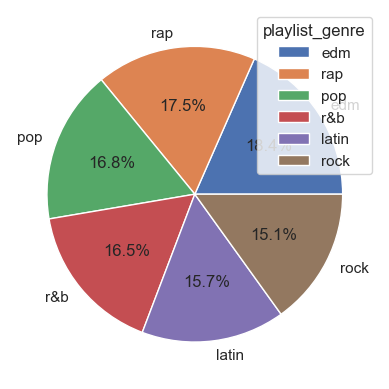

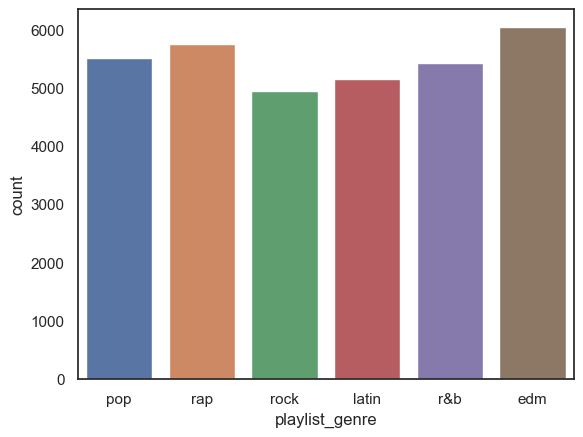

In [154]:
plt.pie(classification_df["playlist_genre"].value_counts().values, labels = classification_df["playlist_genre"].value_counts().index, autopct='%1.1f%%')
plt.legend(title="playlist_genre")
plt.show(block=True)

sns.countplot(classification_df, x="playlist_genre")
plt.show(block=True)


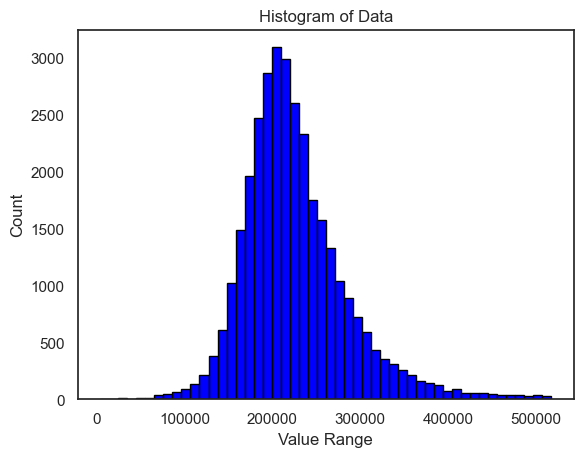

In [155]:
import matplotlib.pyplot as plt
import numpy as np


data = classification_df.iloc[:, -2].values

# Create a histogram
plt.hist(data, bins=50, color='blue', edgecolor='black')

# Add labels and title
plt.xlabel('Value Range')
plt.ylabel('Count')
plt.title('Histogram of Data')

# Show the plot
plt.show()

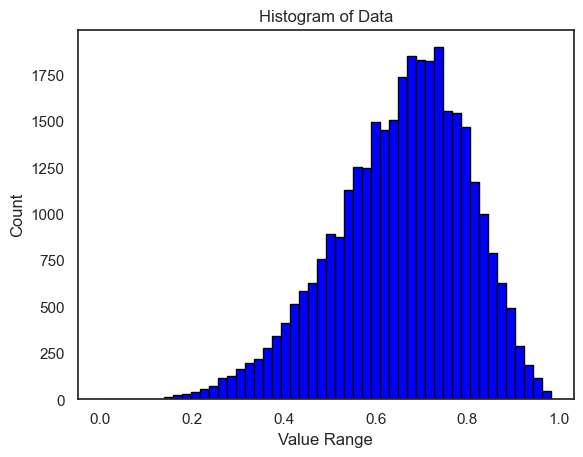

In [156]:
import matplotlib.pyplot as plt
import numpy as np


data = classification_df.iloc[:, 0].values

# Create a histogram
plt.hist(data, bins=50, color='blue', edgecolor='black')

# Add labels and title
plt.xlabel('Value Range')
plt.ylabel('Count')
plt.title('Histogram of Data')

# Show the plot
plt.show()

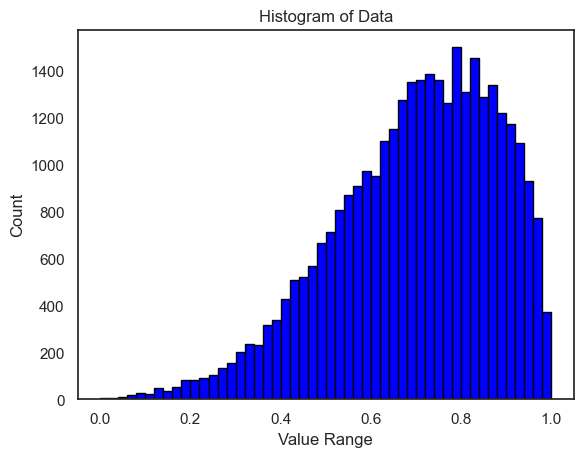

In [157]:
import matplotlib.pyplot as plt
import numpy as np


data = classification_df.iloc[:, 1].values

# Create a histogram
plt.hist(data, bins=50, color='blue', edgecolor='black')

# Add labels and title
plt.xlabel('Value Range')
plt.ylabel('Count')
plt.title('Histogram of Data')

# Show the plot
plt.show()

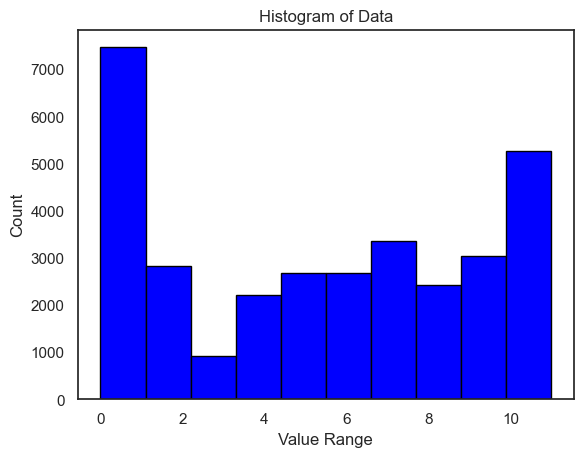

In [158]:
import matplotlib.pyplot as plt
import numpy as np


data = classification_df.iloc[:, 2].values

# Create a histogram
plt.hist(data, bins=10, color='blue', edgecolor='black')

# Add labels and title
plt.xlabel('Value Range')
plt.ylabel('Count')
plt.title('Histogram of Data')

# Show the plot
plt.show()

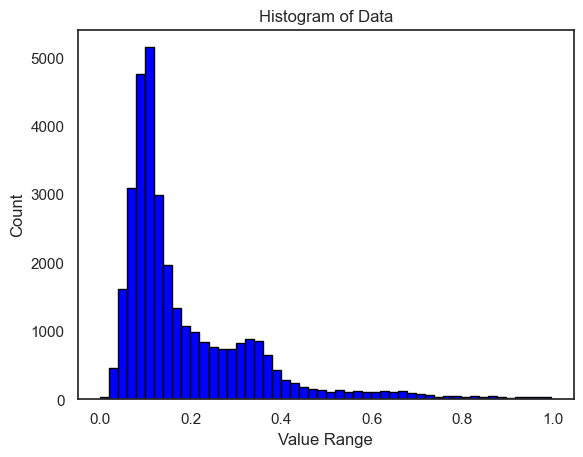

In [159]:
import matplotlib.pyplot as plt
import numpy as np


data = classification_df.iloc[:, 8].values

# Create a histogram
plt.hist(data, bins=50, color='blue', edgecolor='black')

# Add labels and title
plt.xlabel('Value Range')
plt.ylabel('Count')
plt.title('Histogram of Data')

# Show the plot
plt.show()

In [160]:
classification_df.sort_values(by='duration_ms')

danceability  energy  key  loudness  mode  speechiness  acousticness  \
11363         0.000  0.3150    1   -26.087     1       0.0000       0.00000   
8339          0.514  0.7200    1    -8.507     1       0.2060       0.97600   
28161         0.767  0.9120    6    -9.466     1       0.1990       0.00341   
28142         0.800  0.5880    7    -7.240     1       0.0768       0.09460   
24510         0.220  0.0286    1   -34.283     1       0.0562       0.94300   
...             ...     ...  ...       ...   ...          ...           ...   
20643         0.875  0.7850    1    -5.933     0       0.0485       0.00307   
12379         0.531  0.4810    4   -11.709     0       0.0600       0.69900   
11770         0.483  0.6150    2    -8.538     1       0.0497       0.45200   
12391         0.483  0.6150    2    -8.538     1       0.0497       0.45200   
21327         0.711  0.6990    6    -4.891     1       0.1930       0.24800   

       instrumentalness  liveness  valence    tempo  duration_ms  \
11363          0.000000    0.0000   0.0000    0.000         4000   
8339           0.072700    0.9100   0.9770   85.811        29493   
28161          0.854000    0.0900   0.6040  126.059        31429   
28142          0.826000    0.1080   0.9070  128.068        31875   
24510          0.000000    0.2180   0.0383  128.899        31893   
...                 ...       ...      ...      ...          ...   
20643          0.005720    0.0749   0.2830  116.369       516760   
12379          0.000000    0.0842   0.4910  138.450       516893   
11770          0.000414    0.0512   0.5940   80.576       517125   
12391          0.000414    0.0512   0.5940   80.576       517125   
21327          0.000000    0.2540   0.3760  146.016       517810   

      playlist_genre  
11363           rock  
8339             rap  
28161            edm  
28142            edm  
24510            r&b  
...              ...  
20643          latin  
12379           rock  
11770           rock  
12391           rock  
21327          latin  

[32833 rows x 13 columns]

## Encoding categorical data

In [161]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(classification_df[['playlist_genre']].values)

c:\Users\anshulgarg\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [162]:
y_df = classification_df[['playlist_genre']]
y_df

playlist_genre
0                pop
1                pop
2                pop
3                pop
4                pop
...              ...
32828            edm
32829            edm
32830            edm
32831            edm
32832            edm

[32833 rows x 1 columns]

In [163]:
y_encoded_df = pd.DataFrame(y_encoded)

In [164]:
y_encoding_df = pd.merge(y_df,y_encoded_df, left_index=True, right_index=True)
y_encoding_df

playlist_genre  0
0                pop  2
1                pop  2
2                pop  2
3                pop  2
4                pop  2
...              ... ..
32828            edm  0
32829            edm  0
32830            edm  0
32831            edm  0
32832            edm  0

[32833 rows x 2 columns]

In [165]:
y_encoding_df.rename(columns={0:'playlist_genre_encoded'},inplace=True)
y_encoding_df = y_encoding_df.drop_duplicates().reset_index().sort_values(by='playlist_genre_encoded')
y_encoding_df = y_encoding_df[['playlist_genre','playlist_genre_encoded']]
y_encoding_df

playlist_genre  playlist_genre_encoded
5            edm                       0
3          latin                       1
0            pop                       2
4            r&b                       3
1            rap                       4
2           rock                       5

## Correlation Analysis

In [166]:
classification_df = pd.merge(classification_df,y_encoding_df, on='playlist_genre', how='left')
classification_df

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0             0.748   0.916    6    -2.634     1       0.0583      0.102000   
1             0.726   0.815   11    -4.969     1       0.0373      0.072400   
2             0.675   0.931    1    -3.432     0       0.0742      0.079400   
3             0.718   0.930    7    -3.778     1       0.1020      0.028700   
4             0.650   0.833    1    -4.672     1       0.0359      0.080300   
...             ...     ...  ...       ...   ...          ...           ...   
32828         0.428   0.922    2    -1.814     1       0.0936      0.076600   
32829         0.522   0.786    0    -4.462     1       0.0420      0.001710   
32830         0.529   0.821    6    -4.899     0       0.0481      0.108000   
32831         0.626   0.888    2    -3.361     1       0.1090      0.007920   
32832         0.603   0.884    5    -4.571     0       0.0385      0.000133   

       instrumentalness  liveness  valence    tempo  duration_ms  \
0              0.000000    0.0653   0.5180  122.036       194754   
1              0.004210    0.3570   0.6930   99.972       162600   
2              0.000023    0.1100   0.6130  124.008       176616   
3              0.000009    0.2040   0.2770  121.956       169093   
4              0.000000    0.0833   0.7250  123.976       189052   
...                 ...       ...      ...      ...          ...   
32828          0.000000    0.0668   0.2100  128.170       204375   
32829          0.004270    0.3750   0.4000  128.041       353120   
32830          0.000001    0.1500   0.4360  127.989       210112   
32831          0.127000    0.3430   0.3080  128.008       367432   
32832          0.341000    0.7420   0.0894  127.984       337500   

      playlist_genre  playlist_genre_encoded  
0                pop                       2  
1                pop                       2  
2                pop                       2  
3                pop                       2  
4                pop                       2  
...              ...                     ...  
32828            edm                       0  
32829            edm                       0  
32830            edm                       0  
32831            edm                       0  
32832            edm                       0  

[32833 rows x 14 columns]

In [167]:
classification_df = classification_df[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'playlist_genre_encoded']]

In [168]:
x_axis_labels = classification_df.columns
x_axis_labels

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'playlist_genre_encoded'],
      dtype='object')

In [169]:
# correlation_matrix = np.corrcoef(X_train, rowvar=False)

correlation_matrix = np.corrcoef(classification_df.values, rowvar=False)

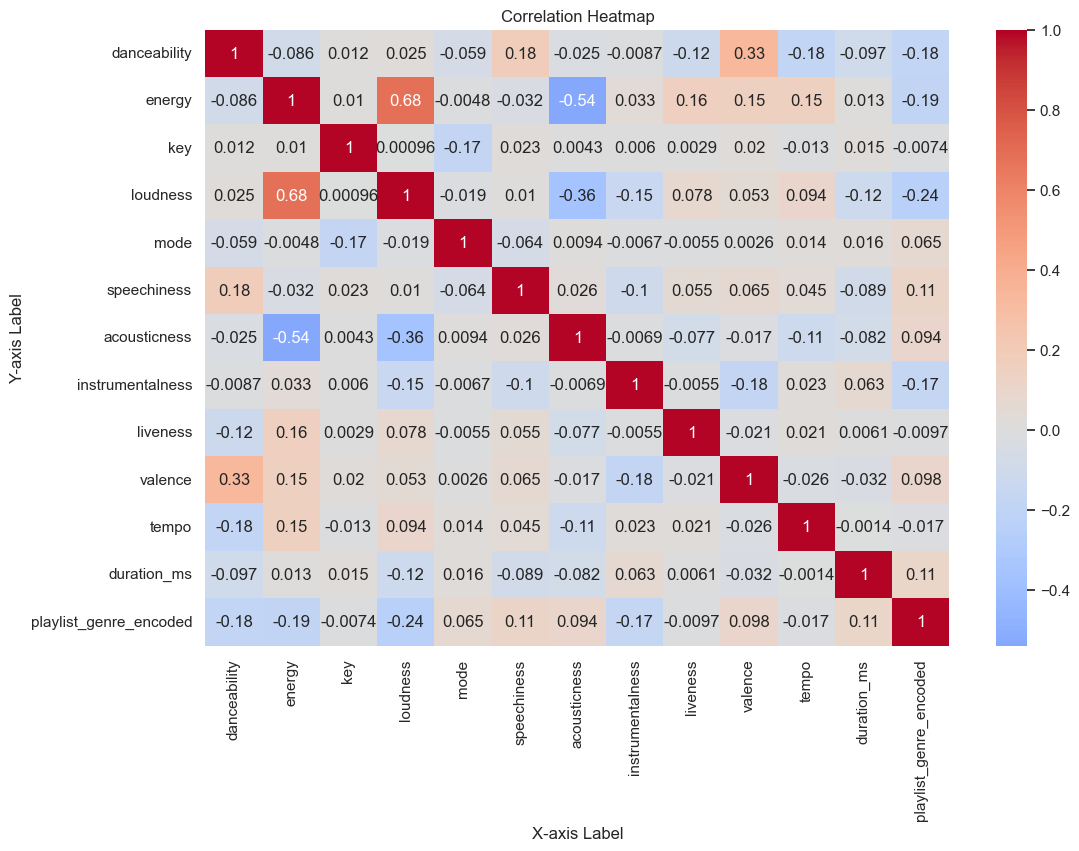

In [170]:
sns.set(style="white")
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0, xticklabels=x_axis_labels, yticklabels =x_axis_labels )
# heatmap = sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0 )
plt.title("Correlation Heatmap")
plt.xlabel("X-axis Label")
plt.ylabel("Y-axis Label")
plt.show()

- Notes
    - High Correlation 
      - 0.68 energy vs loudness
      - -.54 energy vs acousticness 



To handle correlation - 
<br>
1. Feature selection
<br>
1a. Try eliminating energy or loudness
<br>
1b. Use combined value like average

## Test Train Split

In [171]:
classification_df.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'playlist_genre_encoded'],
      dtype='object')

In [172]:
X = classification_df.iloc[:, :-1].values # first column is index
y = classification_df.iloc[:, -1].values

In [173]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_encoded_train, y_encoded_test = train_test_split(X, y_encoded, test_size = 0.25, random_state = 0)

## Feature Scaling

In [174]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Logistic Regression model

In [175]:
from sklearn.linear_model import LogisticRegression
Logistics_classifier = LogisticRegression(random_state = 0)
Logistics_classifier.fit(X_train, y_encoded_train)

LogisticRegression(random_state=0)

In [176]:
## Predicting the Test set results

y_pred = Logistics_classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_encoded_test.reshape(len(y_encoded_test),1)),1))

[[2 0]
 [4 3]
 [4 4]
 ...
 [5 2]
 [5 3]
 [0 2]]


In [177]:
import statsmodels.api as sm
model = sm.MNLogit(y_encoded_train, sm.add_constant(X_train))  # Assuming X_train is a DataFrame
result = model.fit()

Optimization terminated successfully.
         Current function value: 1.390788
         Iterations 7


In [178]:
print(result.summary())

                          MNLogit Regression Results                          
Dep. Variable:                      y   No. Observations:                24624
Model:                        MNLogit   Df Residuals:                    24559
Method:                           MLE   Df Model:                           60
Date:                Fri, 05 Jan 2024   Pseudo R-squ.:                  0.2229
Time:                        22:00:05   Log-Likelihood:                -34247.
converged:                       True   LL-Null:                       -44067.
Covariance Type:            nonrobust   LLR p-value:                     0.000
       y=1       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2368      0.031      7.612      0.000       0.176       0.298
x1             0.0363      0.033      1.109      0.268      -0.028       0.101
x2            -0.5156      0.043    -11.903      0.0

### Making the Confusion Matrix

In [179]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_encoded_test, y_pred)
print(cm)
Logistics_classifier_accuracy_score = accuracy_score(y_encoded_test, y_pred)
Logistics_classifier_accuracy_score

[[931 114 199  67 121 103]
 [192 465 178 154 186 115]
 [248 216 352 164 110 262]
 [ 68 174 161 539 233 168]
 [153 155  96 197 772  60]
 [137  63  80 131  18 827]]


0.47338287245705934

In [180]:
# Calculate precision for each class
precision_per_class = precision_score(y_encoded_test, y_pred, average=None)

print('Precision for each class:')
for class_idx, precision in enumerate(precision_per_class):
    print(f'Class {class_idx}: {precision:.2f}')

Precision for each class:
Class 0: 0.54
Class 1: 0.39
Class 2: 0.33
Class 3: 0.43
Class 4: 0.54
Class 5: 0.54


In [181]:
# Calculate recall for each class
recall_per_class = recall_score(y_encoded_test, y_pred, average=None)

print('Recall (Sensitivity) for each class:')
for class_idx, recall in enumerate(recall_per_class):
    print(f'Class {class_idx}: {recall:.2f}')

Recall (Sensitivity) for each class:
Class 0: 0.61
Class 1: 0.36
Class 2: 0.26
Class 3: 0.40
Class 4: 0.54
Class 5: 0.66


In [182]:
# Create a confusion matrix
conf_matrix = confusion_matrix(y_encoded_test, y_pred)

# Calculate specificity-like measure for each class
specificity_per_class = []
for class_idx in range(4):
    other_classes = [c for c in range(4) if c != class_idx]
    true_negatives = sum([conf_matrix[i, j] for i in other_classes for j in other_classes])
    total_negatives = sum([conf_matrix[i, j] for i in other_classes for j in range(4)])
    specificity = true_negatives / total_negatives
    specificity_per_class.append(specificity)

print('Specificity-like measure for each class:')
for class_idx, specificity in enumerate(specificity_per_class):
    print(f'Class {class_idx}: {specificity:.2f}')

Specificity-like measure for each class:
Class 0: 0.83
Class 1: 0.84
Class 2: 0.83
Class 3: 0.88


In [183]:
# Calculate F1-score for each class
f1_score_per_class = f1_score(y_encoded_test, y_pred, average=None)

print('F1-Score for each class:')
for class_idx, f1_score in enumerate(f1_score_per_class):
    print(f'Class {class_idx}: {f1_score:.2f}')

F1-Score for each class:
Class 0: 0.57
Class 1: 0.38
Class 2: 0.29
Class 3: 0.42
Class 4: 0.54
Class 5: 0.59


In [184]:
# log loss

In [185]:
# Balanced Accuracy

### Visualising the Training set results

In [186]:
# from matplotlib.colors import ListedColormap
# X_set, y_set = sc.inverse_transform(X_train), y_train
# X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
#                      np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
# plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
#              alpha = 0.75, cmap = ListedColormap(('red', 'green')))
# plt.xlim(X1.min(), X1.max())
# plt.ylim(X2.min(), X2.max())
# for i, j in enumerate(np.unique(y_set)):
#     plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
# plt.title('Logistic Regression (Training set)')
# plt.xlabel('Age')
# plt.ylabel('Estimated Salary')
# plt.legend()
# plt.show()

### Visualising the Test set results

In [187]:
# from matplotlib.colors import ListedColormap
# X_set, y_set = sc.inverse_transform(X_test), y_test
# X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
#                      np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
# plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
#              alpha = 0.75, cmap = ListedColormap(('red', 'green')))
# plt.xlim(X1.min(), X1.max())
# plt.ylim(X2.min(), X2.max())
# for i, j in enumerate(np.unique(y_set)):
#     plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
# plt.title('Logistic Regression (Test set)')
# plt.xlabel('Age')
# plt.ylabel('Estimated Salary')
# plt.legend()
# plt.show()

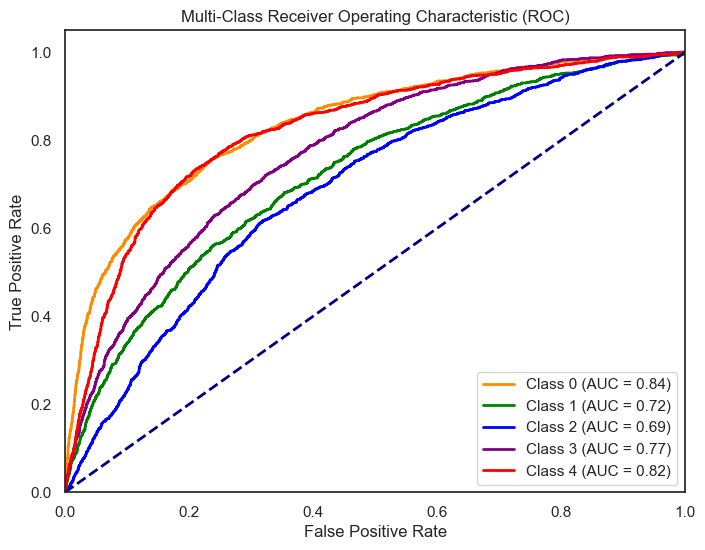

In [188]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# One-hot encode the labels
y_train_bin = label_binarize(y_encoded_train, classes=[0, 1, 2, 3,4])
y_test_bin = label_binarize(y_encoded_test, classes=[0, 1, 2, 3,4])

# Create and train a logistic regression model
model = LogisticRegression(multi_class='ovr')  # One-vs-Rest strategy
model.fit(X_train, y_encoded_train)

# Predict probabilities for all classes
y_probs = model.predict_proba(X_test)

# Calculate ROC curve for each class
fpr = {}
tpr = {}
roc_auc = {}
for i in range(5):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curves for each class
plt.figure(figsize=(8, 6))
colors = ['darkorange', 'green', 'blue', 'purple','red']
for i, color in zip(range(5), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()



# LDA Model

In [189]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
LDA_classifier = LinearDiscriminantAnalysis()
LDA_classifier.fit(X_train, y_encoded_train)

LinearDiscriminantAnalysis()

In [190]:
## Predicting a new result

# print(classifier.predict(sc.transform([[30,87000]])))

In [191]:
## Predicting the Test set results

y_pred = LDA_classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_encoded_test.reshape(len(y_encoded_test),1)),1))

[[2 0]
 [4 3]
 [0 4]
 ...
 [5 2]
 [5 3]
 [0 2]]


### Making the Confusion Matrix

In [192]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_encoded_test, y_pred)
print(cm)
LDA_classifier_accuracy_score = accuracy_score(y_encoded_test, y_pred)
LDA_classifier_accuracy_score

[[852 143 277  60 111  92]
 [164 502 197 146 184  97]
 [197 239 396 161 108 251]
 [ 53 205 164 492 261 168]
 [140 168 111 159 783  72]
 [112  73 117 127  17 810]]


0.4671701790717505

### Visualising the Training set results

In [193]:
# from matplotlib.colors import ListedColormap
# X_set, y_set = sc.inverse_transform(X_train), y_train
# X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
#                      np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
# plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
#              alpha = 0.75, cmap = ListedColormap(('red', 'green')))
# plt.xlim(X1.min(), X1.max())
# plt.ylim(X2.min(), X2.max())
# for i, j in enumerate(np.unique(y_set)):
#     plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
# plt.title('Logistic Regression (Training set)')
# plt.xlabel('Age')
# plt.ylabel('Estimated Salary')
# plt.legend()
# plt.show()

### Visualising the Test set results

In [194]:
# from matplotlib.colors import ListedColormap
# X_set, y_set = sc.inverse_transform(X_test), y_test
# X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
#                      np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
# plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
#              alpha = 0.75, cmap = ListedColormap(('red', 'green')))
# plt.xlim(X1.min(), X1.max())
# plt.ylim(X2.min(), X2.max())
# for i, j in enumerate(np.unique(y_set)):
#     plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
# plt.title('Logistic Regression (Test set)')
# plt.xlabel('Age')
# plt.ylabel('Estimated Salary')
# plt.legend()
# plt.show()

# QDA Model

In [195]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis 
QDA_classifier = QuadraticDiscriminantAnalysis()
QDA_classifier.fit(X_train, y_encoded_train)

QuadraticDiscriminantAnalysis()

In [196]:
## Predicting a new result

# print(classifier.predict(sc.transform([[30,87000]])))

In [197]:
## Predicting the Test set results

y_pred = QDA_classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_encoded_test.reshape(len(y_encoded_test),1)),1))

[[2 0]
 [3 3]
 [4 4]
 ...
 [5 2]
 [5 3]
 [0 2]]


### Making the Confusion Matrix

In [198]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_encoded_test, y_pred)
print(cm)
QDA_classifier_accuracy_score = accuracy_score(y_encoded_test, y_pred)
QDA_classifier_accuracy_score

[[948  68 293  55  91  80]
 [148 429 328 152 128 105]
 [211 140 534 160  86 221]
 [ 59 156 229 536 186 177]
 [105 192 154 248 668  66]
 [104  45 148  91  32 836]]


0.4813010110853941

### Visualising the Training set results

In [199]:
# from matplotlib.colors import ListedColormap
# X_set, y_set = sc.inverse_transform(X_train), y_train
# X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
#                      np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
# plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
#              alpha = 0.75, cmap = ListedColormap(('red', 'green')))
# plt.xlim(X1.min(), X1.max())
# plt.ylim(X2.min(), X2.max())
# for i, j in enumerate(np.unique(y_set)):
#     plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
# plt.title('Logistic Regression (Training set)')
# plt.xlabel('Age')
# plt.ylabel('Estimated Salary')
# plt.legend()
# plt.show()

### Visualising the Test set results

In [200]:
# from matplotlib.colors import ListedColormap
# X_set, y_set = sc.inverse_transform(X_test), y_test
# X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
#                      np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
# plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
#              alpha = 0.75, cmap = ListedColormap(('red', 'green')))
# plt.xlim(X1.min(), X1.max())
# plt.ylim(X2.min(), X2.max())
# for i, j in enumerate(np.unique(y_set)):
#     plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
# plt.title('Logistic Regression (Test set)')
# plt.xlabel('Age')
# plt.ylabel('Estimated Salary')
# plt.legend()
# plt.show()

# K-NN Model

In [201]:
from sklearn.neighbors import KNeighborsClassifier
KNN_classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
KNN_classifier.fit(X_train, y_encoded_train)

KNeighborsClassifier()

In [202]:
# ## Predicting a new result
# print(classifier.predict(sc.transform([[30,87000]])))

In [203]:
## Predicting the Test set results
y_pred = KNN_classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_encoded_test.reshape(len(y_encoded_test),1)),1))

[[0 0]
 [1 3]
 [2 4]
 ...
 [5 2]
 [2 3]
 [0 2]]


## Making the Confusion Matrix

In [204]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_encoded_test, y_pred)
print(cm)
KNN_classifier_accuracy_score = accuracy_score(y_encoded_test, y_pred)
KNN_classifier_accuracy_score

[[1024  132  205   57   61   56]
 [ 185  540  206  178  128   53]
 [ 316  243  433  153   70  137]
 [  95  247  237  486  178  100]
 [ 159  230  141  262  594   47]
 [ 153  106  171  112   16  698]]


0.45986112803021073

## Visualising the Training set results

In [205]:
# from matplotlib.colors import ListedColormap
# X_set, y_set = sc.inverse_transform(X_train), y_train
# X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
#                      np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
# plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
#              alpha = 0.75, cmap = ListedColormap(('red', 'green')))
# plt.xlim(X1.min(), X1.max())
# plt.ylim(X2.min(), X2.max())
# for i, j in enumerate(np.unique(y_set)):
#     plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
# plt.title('K-NN (Training set)')
# plt.xlabel('Age')
# plt.ylabel('Estimated Salary')
# plt.legend()
# plt.show()

## Visualising the Test set results

In [206]:
# from matplotlib.colors import ListedColormap
# X_set, y_set = sc.inverse_transform(X_test), y_test
# X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
#                      np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
# plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
#              alpha = 0.75, cmap = ListedColormap(('red', 'green')))
# plt.xlim(X1.min(), X1.max())
# plt.ylim(X2.min(), X2.max())
# for i, j in enumerate(np.unique(y_set)):
#     plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
# plt.title('K-NN (Test set)')
# plt.xlabel('Age')
# plt.ylabel('Estimated Salary')
# plt.legend()
# plt.show()

# SVM Model

In [207]:
# from sklearn.svm import SVC
# SVM_classifier = SVC(kernel = 'linear', random_state = 0)
# SVM_classifier.fit(X_train, y_train)

In [208]:
# ## Predicting a new result
# print(classifier.predict(sc.transform([[30,87000]])))

In [209]:
# ## Predicting the Test set results

# y_pred = SVM_classifier.predict(X_test)
# print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

## Making the Confusion Matrix

In [210]:
# from sklearn.metrics import confusion_matrix, accuracy_score
# cm = confusion_matrix(y_test, y_pred)
# print(cm)
# SVM_classifier_accuracy_score = accuracy_score(y_test, y_pred)
# SVM_classifier_accuracy_score

## Visualising the Training set results

In [211]:
# from matplotlib.colors import ListedColormap
# X_set, y_set = sc.inverse_transform(X_train), y_train
# X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
#                      np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
# plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
#              alpha = 0.75, cmap = ListedColormap(('red', 'green')))
# plt.xlim(X1.min(), X1.max())
# plt.ylim(X2.min(), X2.max())
# for i, j in enumerate(np.unique(y_set)):
#     plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
# plt.title('SVM (Training set)')
# plt.xlabel('Age')
# plt.ylabel('Estimated Salary')
# plt.legend()
# plt.show()

## Visualising the Test set results

In [212]:
# from matplotlib.colors import ListedColormap
# X_set, y_set = sc.inverse_transform(X_test), y_test
# X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
#                      np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
# plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
#              alpha = 0.75, cmap = ListedColormap(('red', 'green')))
# plt.xlim(X1.min(), X1.max())
# plt.ylim(X2.min(), X2.max())
# for i, j in enumerate(np.unique(y_set)):
#     plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
# plt.title('SVM (Test set)')
# plt.xlabel('Age')
# plt.ylabel('Estimated Salary')
# plt.legend()
# plt.show()

# Kernel SVM Model

In [213]:
# from sklearn.svm import SVC
# Kernel_SVM_classifier = SVC(kernel = 'rbf', random_state = 0)
# Kernel_SVM_classifier.fit(X_train, y_train)

In [214]:
# ## Predicting a new result
# print(classifier.predict(sc.transform([[30,87000]])))

In [215]:
# ## Predicting the Test set results

# y_pred = Kernel_SVM_classifier.predict(X_test)
# print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

## Making the Confusion Matrix

In [216]:
# from sklearn.metrics import confusion_matrix, accuracy_score
# cm = confusion_matrix(y_test, y_pred)
# print(cm)
# Kernel_SVM_classifier_accuracy_score = accuracy_score(y_test, y_pred)
# Kernel_SVM_classifier_accuracy_score

## Visualising the Training set results

In [217]:
# from matplotlib.colors import ListedColormap
# X_set, y_set = sc.inverse_transform(X_train), y_train
# X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
#                      np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
# plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
#              alpha = 0.75, cmap = ListedColormap(('red', 'green')))
# plt.xlim(X1.min(), X1.max())
# plt.ylim(X2.min(), X2.max())
# for i, j in enumerate(np.unique(y_set)):
#     plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
# plt.title('SVM (Training set)')
# plt.xlabel('Age')
# plt.ylabel('Estimated Salary')
# plt.legend()
# plt.show()

## Visualising the Test set results

In [218]:
# from matplotlib.colors import ListedColormap
# X_set, y_set = sc.inverse_transform(X_test), y_test
# X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
#                      np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
# plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
#              alpha = 0.75, cmap = ListedColormap(('red', 'green')))
# plt.xlim(X1.min(), X1.max())
# plt.ylim(X2.min(), X2.max())
# for i, j in enumerate(np.unique(y_set)):
#     plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
# plt.title('SVM (Test set)')
# plt.xlabel('Age')
# plt.ylabel('Estimated Salary')
# plt.legend()
# plt.show()

# Naive Bayes Model

In [220]:
from sklearn.naive_bayes import GaussianNB
Naive_Bayes_classifier = GaussianNB()
Naive_Bayes_classifier.fit(X_train, y_encoded_train)

GaussianNB()

In [ ]:
# ## Predicting a new result
# print(classifier.predict(sc.transform([[30,87000]])))

In [221]:
## Predicting the Test set results

y_pred = Naive_Bayes_classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_encoded_test.reshape(len(y_encoded_test),1)),1))

[[0 0]
 [3 3]
 [4 4]
 ...
 [5 2]
 [5 3]
 [0 2]]


## Making the Confusion Matrix

In [222]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_encoded_test, y_pred)
print(cm)
Naive_Bayes_classifier_accuracy_score = accuracy_score(y_encoded_test, y_pred)
Naive_Bayes_classifier_accuracy_score

[[1015  116  195   52   82   75]
 [ 175  544  197  183  105   86]
 [ 270  268  374  171   66  203]
 [  69  237  182  551  165  139]
 [ 117  286  133  265  563   69]
 [ 200   80  147  147   25  657]]


0.451212084297722

## Visualising the Training set results

In [ ]:
# from matplotlib.colors import ListedColormap
# X_set, y_set = sc.inverse_transform(X_train), y_train
# X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
#                      np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
# plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
#              alpha = 0.75, cmap = ListedColormap(('red', 'green')))
# plt.xlim(X1.min(), X1.max())
# plt.ylim(X2.min(), X2.max())
# for i, j in enumerate(np.unique(y_set)):
#     plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
# plt.title('SVM (Training set)')
# plt.xlabel('Age')
# plt.ylabel('Estimated Salary')
# plt.legend()
# plt.show()

## Visualising the Test set results

In [223]:
# from matplotlib.colors import ListedColormap
# X_set, y_set = sc.inverse_transform(X_test), y_test
# X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
#                      np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
# plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
#              alpha = 0.75, cmap = ListedColormap(('red', 'green')))
# plt.xlim(X1.min(), X1.max())
# plt.ylim(X2.min(), X2.max())
# for i, j in enumerate(np.unique(y_set)):
#     plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
# plt.title('SVM (Test set)')
# plt.xlabel('Age')
# plt.ylabel('Estimated Salary')
# plt.legend()
# plt.show()

# Decision Tree Model

In [224]:
from sklearn.tree import DecisionTreeClassifier
Decision_Tree_classifier = DecisionTreeClassifier()
Decision_Tree_classifier.fit(X_train, y_encoded_train)

DecisionTreeClassifier()

In [225]:
# ## Predicting a new result
# print(classifier.predict(sc.transform([[30,87000]])))

In [226]:
## Predicting the Test set results

y_pred = Decision_Tree_classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_encoded_test.reshape(len(y_encoded_test),1)),1))

[[0 0]
 [0 3]
 [2 4]
 ...
 [2 2]
 [0 3]
 [0 2]]


## Making the Confusion Matrix

In [227]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_encoded_test, y_pred)
print(cm)
Decision_Tree_classifier_accuracy_score = accuracy_score(y_encoded_test, y_pred)
Decision_Tree_classifier_accuracy_score

[[881 133 272  81  90  78]
 [162 482 219 192 160  75]
 [260 240 385 166 113 188]
 [ 86 190 219 498 232 118]
 [113 203 141 298 617  61]
 [ 62  78 199 117  51 749]]


0.4400048727006944

## Visualising the Training set results

In [228]:
# from matplotlib.colors import ListedColormap
# X_set, y_set = sc.inverse_transform(X_train), y_train
# X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
#                      np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
# plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
#              alpha = 0.75, cmap = ListedColormap(('red', 'green')))
# plt.xlim(X1.min(), X1.max())
# plt.ylim(X2.min(), X2.max())
# for i, j in enumerate(np.unique(y_set)):
#     plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
# plt.title('SVM (Training set)')
# plt.xlabel('Age')
# plt.ylabel('Estimated Salary')
# plt.legend()
# plt.show()

## Visualising the Test set results

In [229]:
# from matplotlib.colors import ListedColormap
# X_set, y_set = sc.inverse_transform(X_test), y_test
# X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
#                      np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
# plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
#              alpha = 0.75, cmap = ListedColormap(('red', 'green')))
# plt.xlim(X1.min(), X1.max())
# plt.ylim(X2.min(), X2.max())
# for i, j in enumerate(np.unique(y_set)):
#     plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
# plt.title('SVM (Test set)')
# plt.xlabel('Age')
# plt.ylabel('Estimated Salary')
# plt.legend()
# plt.show()

# Random Forest Model

In [230]:
from sklearn.ensemble import RandomForestClassifier
Random_Forest_classifier = RandomForestClassifier()
Random_Forest_classifier.fit(X_train, y_encoded_train)

RandomForestClassifier()

In [231]:
# ## Predicting a new result
# print(classifier.predict(sc.transform([[30,87000]])))

In [232]:
## Predicting the Test set results

y_pred = Random_Forest_classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_encoded_test.reshape(len(y_encoded_test),1)),1))

[[2 0]
 [0 3]
 [0 4]
 ...
 [5 2]
 [0 3]
 [0 2]]


## Making the Confusion Matrix

In [233]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_encoded_test, y_pred)
print(cm)
Random_Forest_classifier_accuracy_score = accuracy_score(y_encoded_test, y_pred)
Random_Forest_classifier_accuracy_score

[[1048   79  244   50   78   36]
 [ 126  519  215  159  208   63]
 [ 207  180  471  188  101  205]
 [  45  115  179  633  264  107]
 [  83  104   73  164  959   50]
 [  38   28  102   89   20  979]]


0.5614569375076136

## Visualising the Training set results

In [234]:
# from matplotlib.colors import ListedColormap
# X_set, y_set = sc.inverse_transform(X_train), y_train
# X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
#                      np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
# plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
#              alpha = 0.75, cmap = ListedColormap(('red', 'green')))
# plt.xlim(X1.min(), X1.max())
# plt.ylim(X2.min(), X2.max())
# for i, j in enumerate(np.unique(y_set)):
#     plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
# plt.title('SVM (Training set)')
# plt.xlabel('Age')
# plt.ylabel('Estimated Salary')
# plt.legend()
# plt.show()

## Visualising the Test set results

In [235]:
# from matplotlib.colors import ListedColormap
# X_set, y_set = sc.inverse_transform(X_test), y_test
# X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
#                      np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
# plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
#              alpha = 0.75, cmap = ListedColormap(('red', 'green')))
# plt.xlim(X1.min(), X1.max())
# plt.ylim(X2.min(), X2.max())
# for i, j in enumerate(np.unique(y_set)):
#     plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
# plt.title('SVM (Test set)')
# plt.xlabel('Age')
# plt.ylabel('Estimated Salary')
# plt.legend()
# plt.show()

# Artificial Neural Network Model

In [236]:
# pip install keras
# pip install tensorflow

In [237]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

In [238]:
# Create the neural network model
num_classes = len(np.unique(y_encoded_train))

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),  # Input layer with 11 features
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=16, activation='relu'),
    tf.keras.layers.Dense(units=8, activation='relu'),
    tf.keras.layers.Dense(units=num_classes, activation='softmax')  # Output layer for multiclass classification
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
# history = model.fit(X_train, y_train, batch_size=64, epochs=10, validation_data=(X_val_scaled, y_val))
history = model.fit(X_train, y_encoded_train, batch_size=64, epochs=10)


# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_encoded_test)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


Epoch 1/10
385/385 [==============================] - 3s 2ms/step - loss: 1.4845 - accuracy: 0.4013
Epoch 2/10
385/385 [==============================] - 1s 2ms/step - loss: 1.3247 - accuracy: 0.4889
Epoch 3/10
385/385 [==============================] - 1s 2ms/step - loss: 1.2903 - accuracy: 0.5028
Epoch 4/10
385/385 [==============================] - 1s 2ms/step - loss: 1.2715 - accuracy: 0.5103
Epoch 5/10
385/385 [==============================] - 1s 2ms/step - loss: 1.2591 - accuracy: 0.5158
Epoch 6/10
385/385 [==============================] - 1s 2ms/step - loss: 1.2477 - accuracy: 0.5208
Epoch 7/10
385/385 [==============================] - 1s 2ms/step - loss: 1.2402 - accuracy: 0.5210
Epoch 8/10
385/385 [==============================] - 1s 2ms/step - loss: 1.2310 - accuracy: 0.5266
Epoch 9/10
385/385 [==============================] - 1s 2ms/step - loss: 1.2241 - accuracy: 0.5283
Epoch 10/10
257/257 [==============================] - 1s 2ms/step - loss: 1.2293 - accuracy: 0.5301

In [239]:
## Predicting the Test set results

y_pred = model.predict(X_test)

y_pred_classes = np.argmax(y_pred, axis=1)
# print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

257/257 [==============================] - 1s 1ms/step


In [240]:
print(np.unique(y_pred_classes))

[0 1 2 3 4 5]


In [241]:
print(np.unique(y_encoded_test))

[0 1 2 3 4 5]


## Making the Confusion Matrix

In [242]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_encoded_test, y_pred_classes)
print(cm)
ANN_accuracy_score = accuracy_score(y_encoded_test, y_pred_classes)
ANN_accuracy_score

[[1079   81  130   63  118   64]
 [ 154  485  138  176  255   82]
 [ 265  179  342  198  136  232]
 [  65  173  101  579  312  113]
 [  96  131   33  142  994   37]
 [  93   59   74  133   24  873]]


0.5301498355463515

## Visualising the Training set results

In [243]:
# from matplotlib.colors import ListedColormap
# X_set, y_set = sc.inverse_transform(X_train), y_train
# X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
#                      np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
# plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
#              alpha = 0.75, cmap = ListedColormap(('red', 'green')))
# plt.xlim(X1.min(), X1.max())
# plt.ylim(X2.min(), X2.max())
# for i, j in enumerate(np.unique(y_set)):
#     plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
# plt.title('SVM (Training set)')
# plt.xlabel('Age')
# plt.ylabel('Estimated Salary')
# plt.legend()
# plt.show()

## Visualising the Test set results

In [244]:
# from matplotlib.colors import ListedColormap
# X_set, y_set = sc.inverse_transform(X_test), y_test
# X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
#                      np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
# plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
#              alpha = 0.75, cmap = ListedColormap(('red', 'green')))
# plt.xlim(X1.min(), X1.max())
# plt.ylim(X2.min(), X2.max())
# for i, j in enumerate(np.unique(y_set)):
#     plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
# plt.title('SVM (Test set)')
# plt.xlabel('Age')
# plt.ylabel('Estimated Salary')
# plt.legend()
# plt.show()

# XG Boost

In [245]:
import xgboost as xgb
from xgboost import XGBClassifier
xgc = XGBClassifier()
xgc.fit(X_train,y_encoded_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [246]:
## Predicting the Test set results
y_pred = xgc.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_encoded_test.reshape(len(y_encoded_test),1)),1))

[[0 0]
 [3 3]
 [4 4]
 ...
 [2 2]
 [0 3]
 [0 2]]


## Making the Confusion Matrix

In [247]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_encoded_test, y_pred)
print(cm)
xgboost_accuracy_score = accuracy_score(y_encoded_test, y_pred)
xgboost_accuracy_score

[[1048   68  252   50   74   43]
 [ 120  523  251  152  179   65]
 [ 201  174  526  154  100  197]
 [  37  135  197  621  246  107]
 [  59  127   81  180  942   44]
 [  38   35  113   93   20  957]]


0.5624314776464856

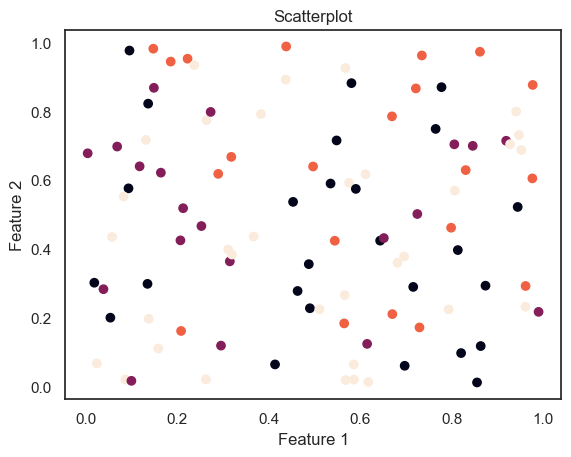

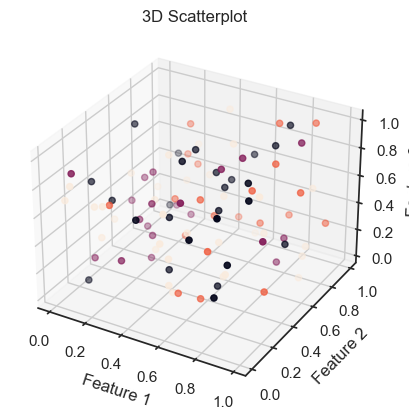

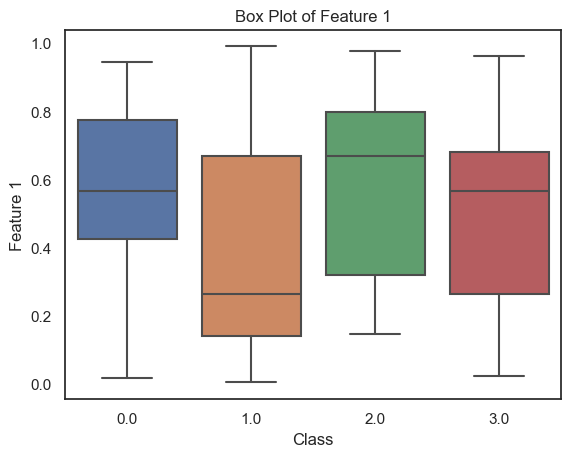

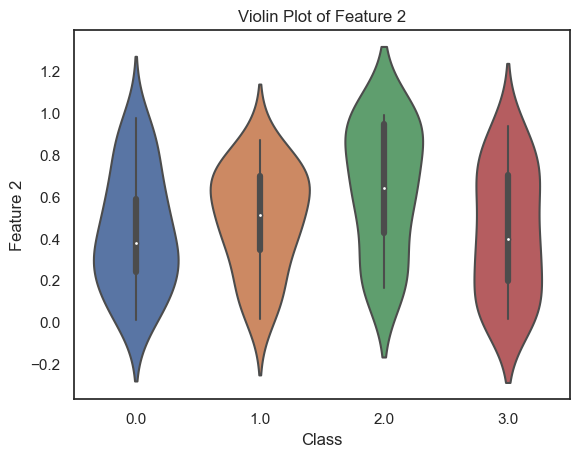

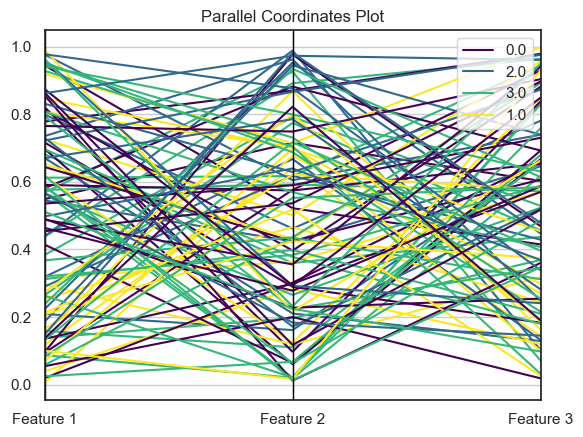

In [248]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Sample data
np.random.seed(0)
data = np.random.rand(100, 3)
classes = np.random.randint(4, size=100)

# Creating a DataFrame
data_with_classes = np.column_stack((data, classes))
df = pd.DataFrame(data_with_classes, columns=['Feature 1', 'Feature 2', 'Feature 3', 'Class'])

# Scatterplot
plt.scatter(data[:, 0], data[:, 1], c=classes)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatterplot')
plt.show()

# 3D Scatterplot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=classes)
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.set_title('3D Scatterplot')
plt.show()

# Box Plots
sns.boxplot(x='Class', y='Feature 1', data=df)
plt.title('Box Plot of Feature 1')
plt.show()

# Violin Plots
sns.violinplot(x='Class', y='Feature 2', data=df)
plt.title('Violin Plot of Feature 2')
plt.show()

# Parallel Coordinates Plot
from pandas.plotting import parallel_coordinates
parallel_coordinates(df, 'Class', colormap='viridis')
plt.title('Parallel Coordinates Plot')
plt.show()

# # 3D Density Plot (using Plotly)
# import plotly.express as px
# fig = px.density_3d(df, x='Feature 1', y='Feature 2', z='Feature 3', color='Class')
# fig.update_layout(title='3D Density Plot')
# fig.show()


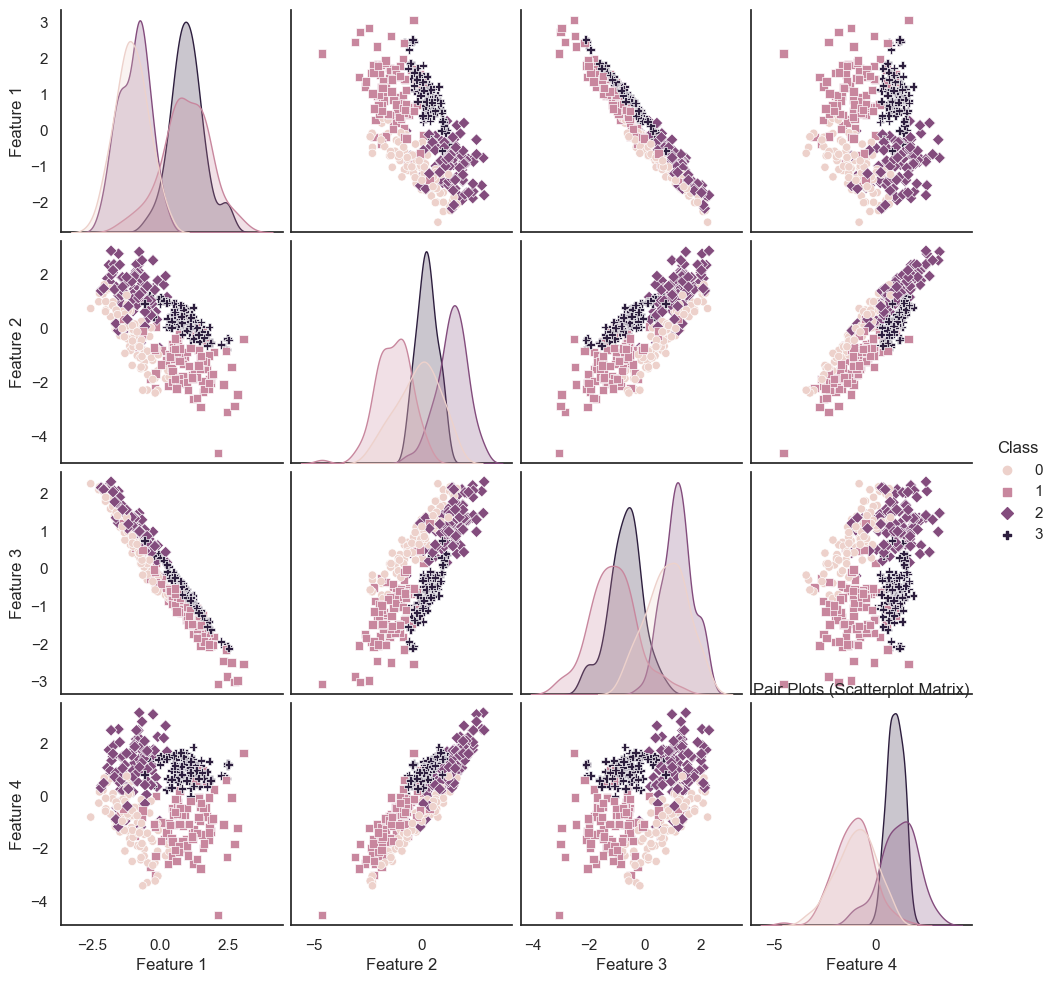

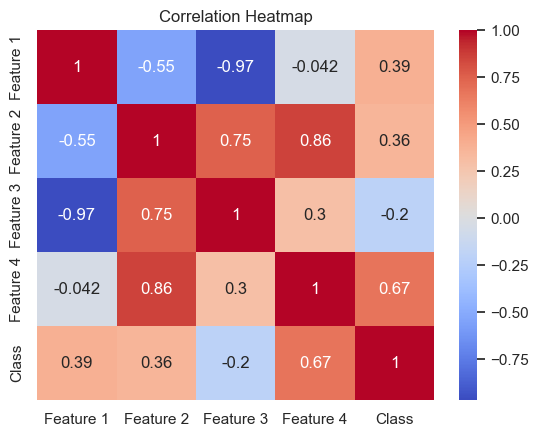

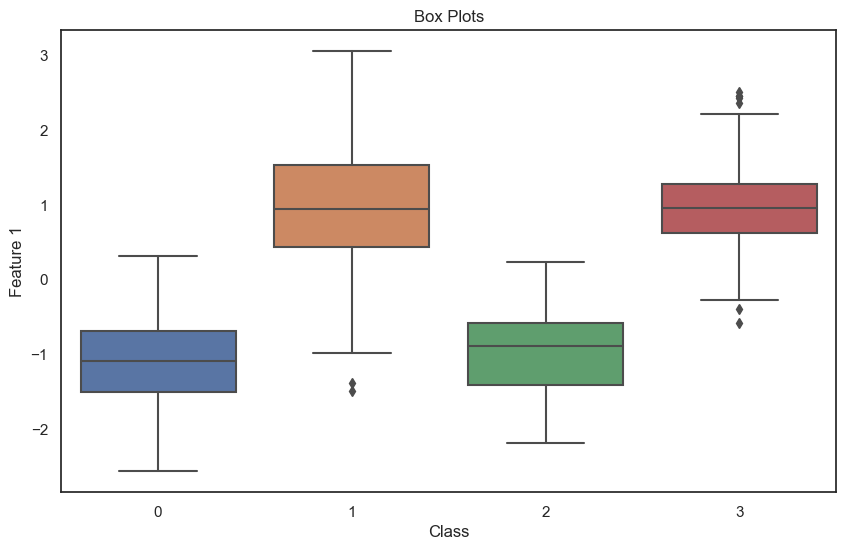

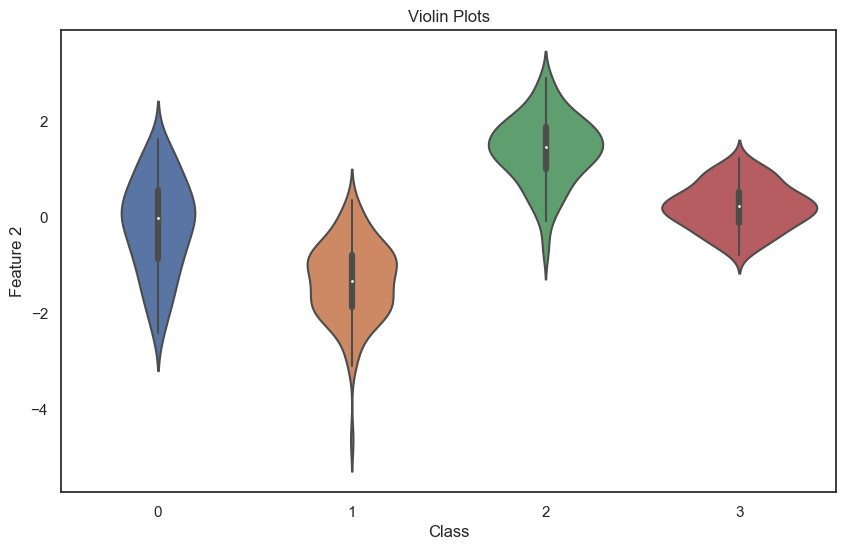

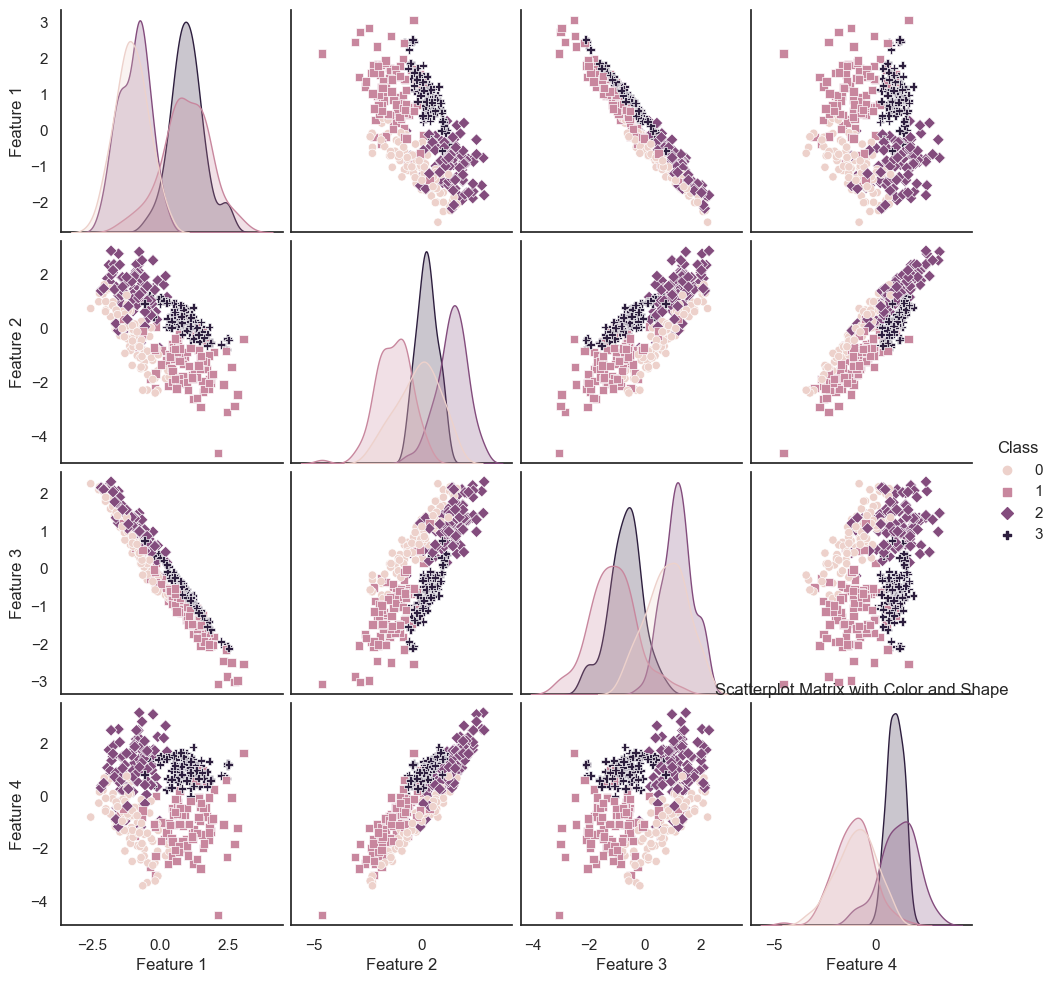

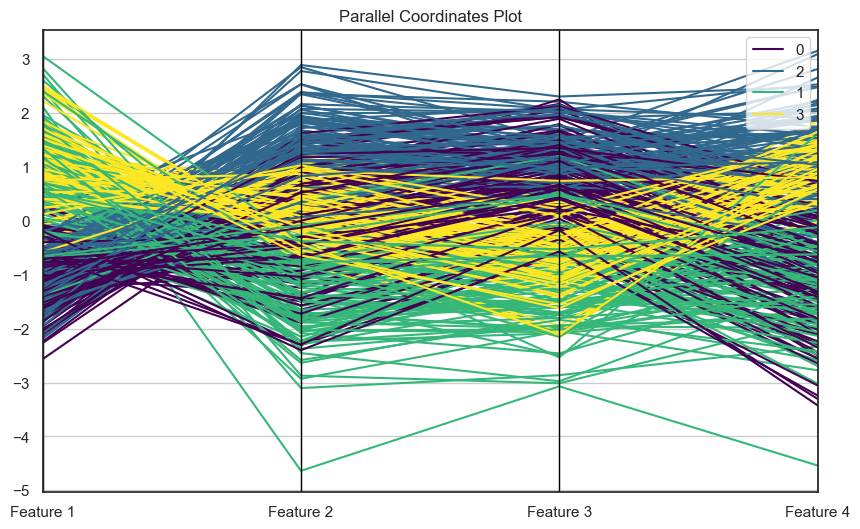

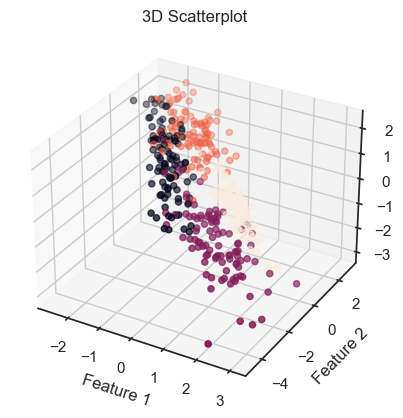

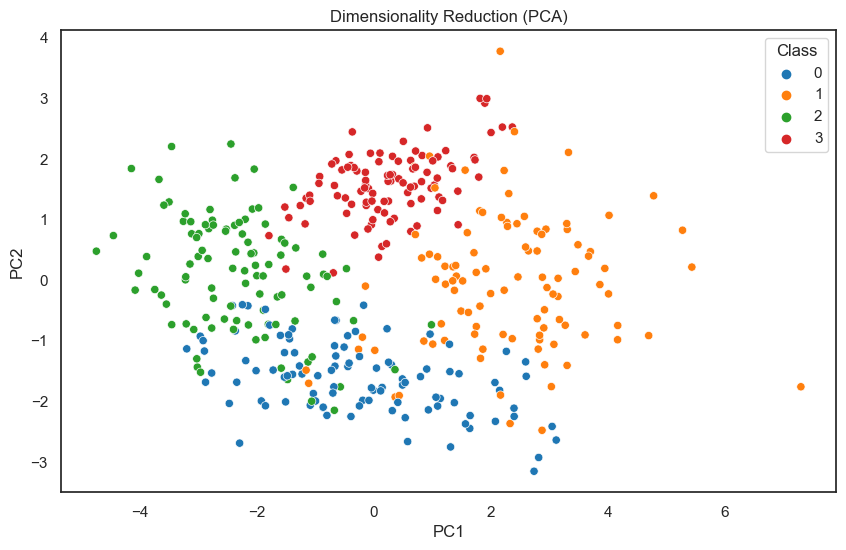

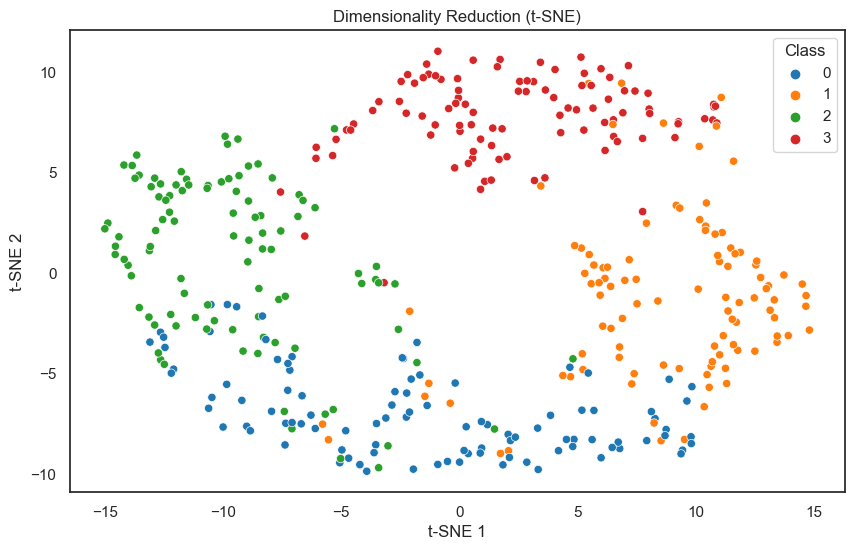

In [249]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Generate synthetic data
X, y = make_classification(n_samples=400, n_features=4, n_classes=4, n_clusters_per_class=1, random_state=42)

# Create a DataFrame
df = pd.DataFrame(X, columns=['Feature 1', 'Feature 2', 'Feature 3', 'Feature 4'])
df['Class'] = y

# Pair Plots (Scatterplot Matrix)
sns.pairplot(df, hue='Class', markers=["o", "s", "D", "P"])
plt.title('Pair Plots (Scatterplot Matrix)')
plt.show()

# Correlation Heatmap
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Box Plots
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Class', y='Feature 1')
plt.title('Box Plots')
plt.show()

# Violin Plots
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Class', y='Feature 2')
plt.title('Violin Plots')
plt.show()

# Scatterplot Matrix with Color and Shape
sns.pairplot(df, hue='Class', markers=["o", "s", "D", "P"])
plt.title('Scatterplot Matrix with Color and Shape')
plt.show()

# Parallel Coordinates Plot
plt.figure(figsize=(10, 6))
pd.plotting.parallel_coordinates(df, 'Class', colormap='viridis')
plt.title('Parallel Coordinates Plot')
plt.show()

# 3D Scatterplot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Feature 1'], df['Feature 2'], df['Feature 3'], c=df['Class'], marker='o')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
plt.title('3D Scatterplot')
plt.show()

# Dimensionality Reduction (PCA)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)
df_pca = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
df_pca['Class'] = y
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Class', palette='tab10')
plt.title('Dimensionality Reduction (PCA)')
plt.show()

# Dimensionality Reduction (t-SNE)
tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
tsne_result = tsne.fit_transform(X)
df_tsne = pd.DataFrame(data=tsne_result, columns=['t-SNE 1', 't-SNE 2'])
df_tsne['Class'] = y
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_tsne, x='t-SNE 1', y='t-SNE 2', hue='Class', palette='tab10')
plt.title('Dimensionality Reduction (t-SNE)')
plt.show()


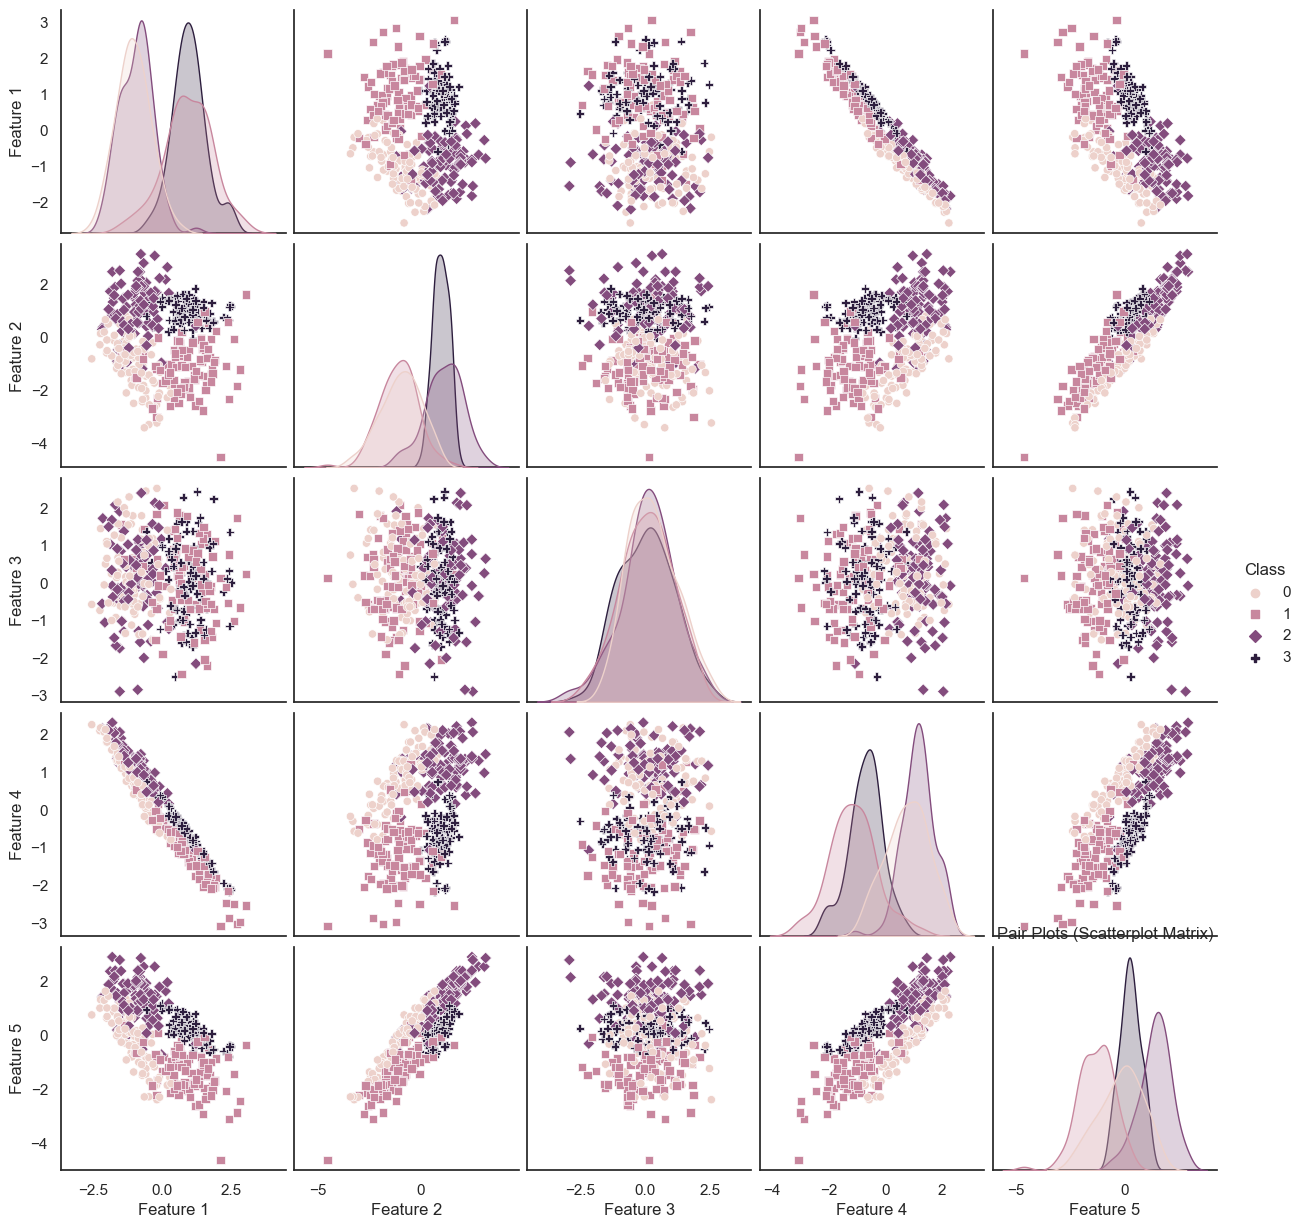

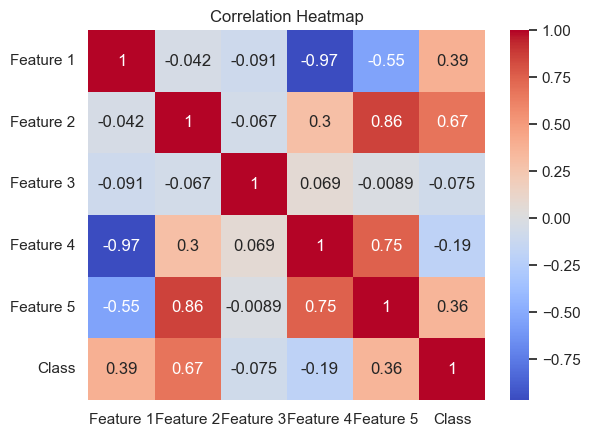

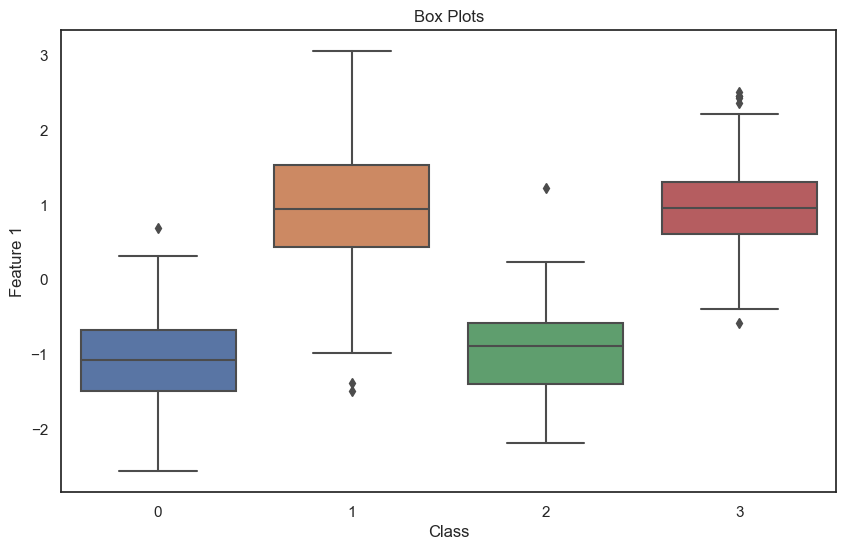

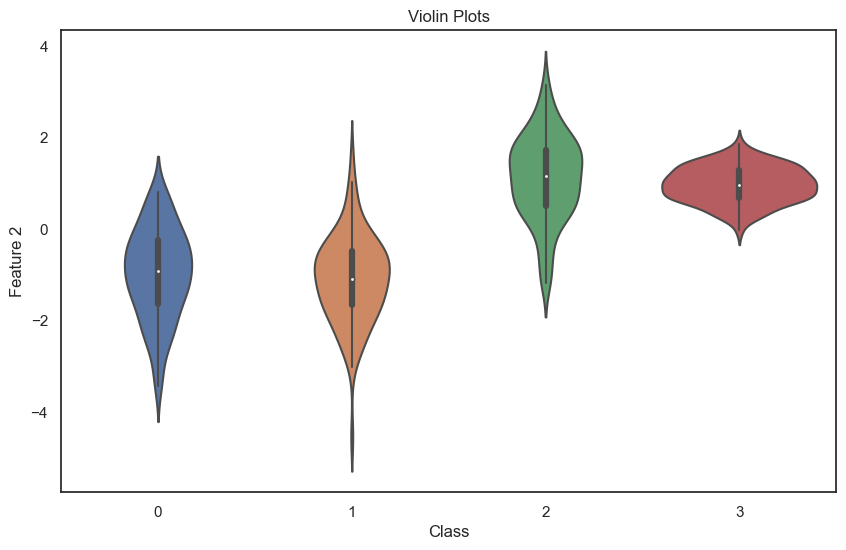

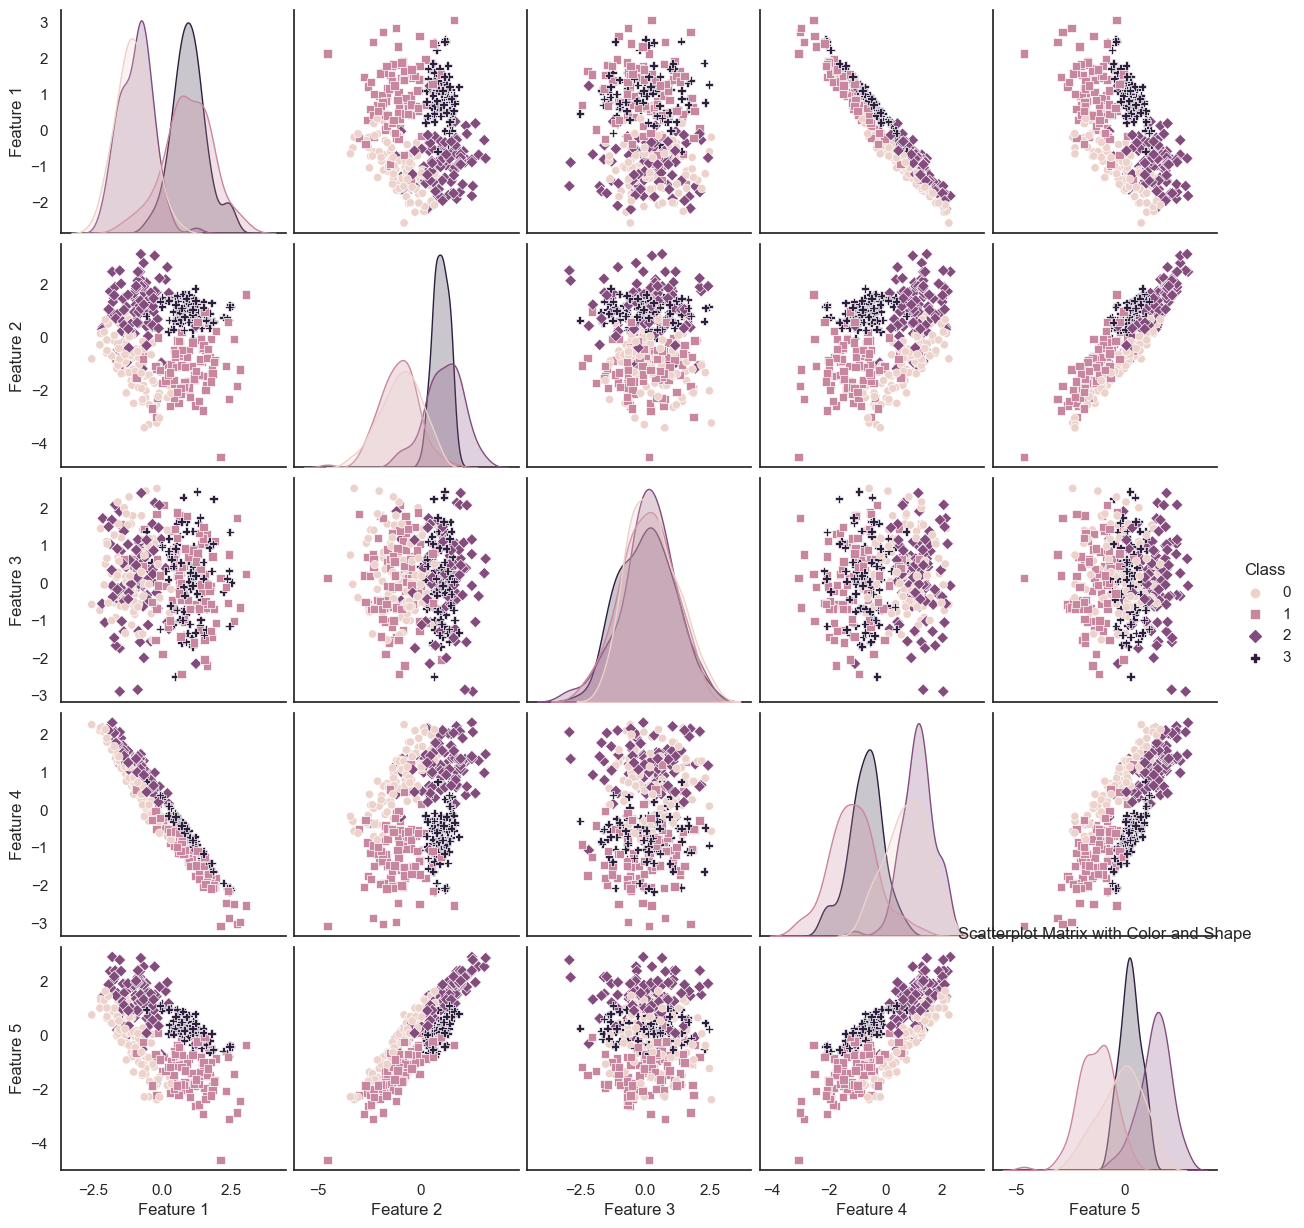

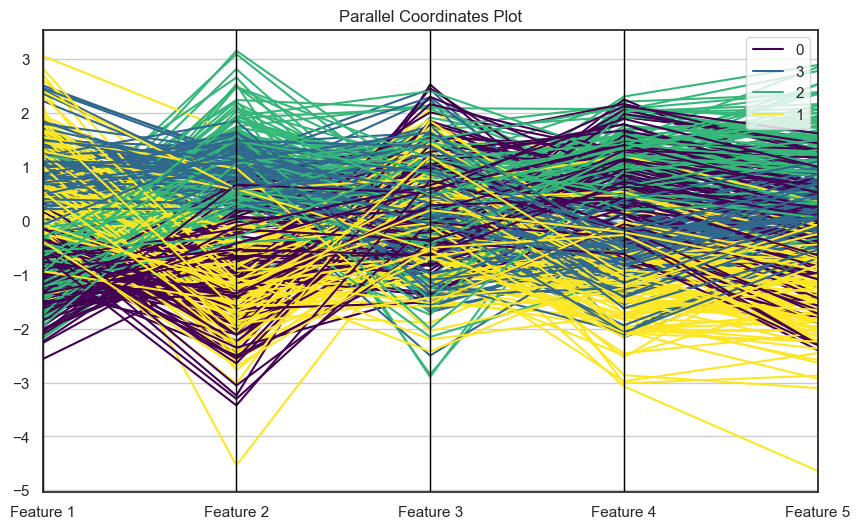

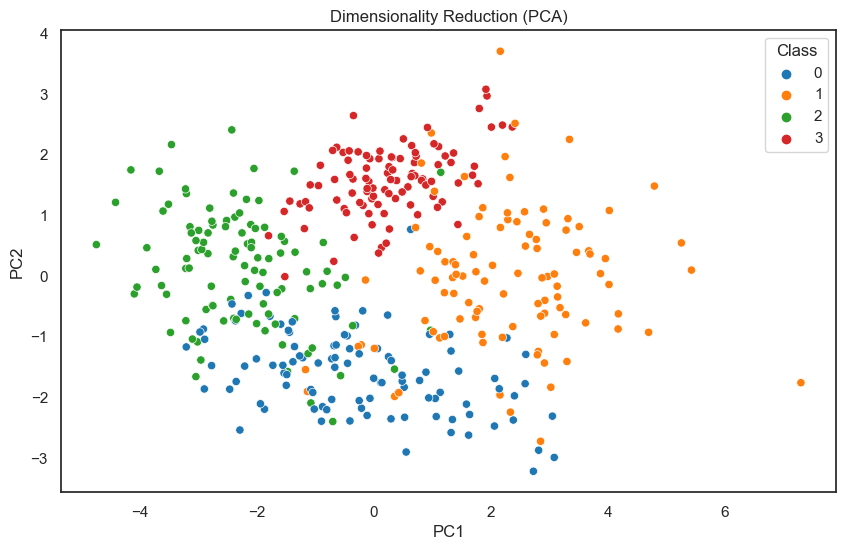

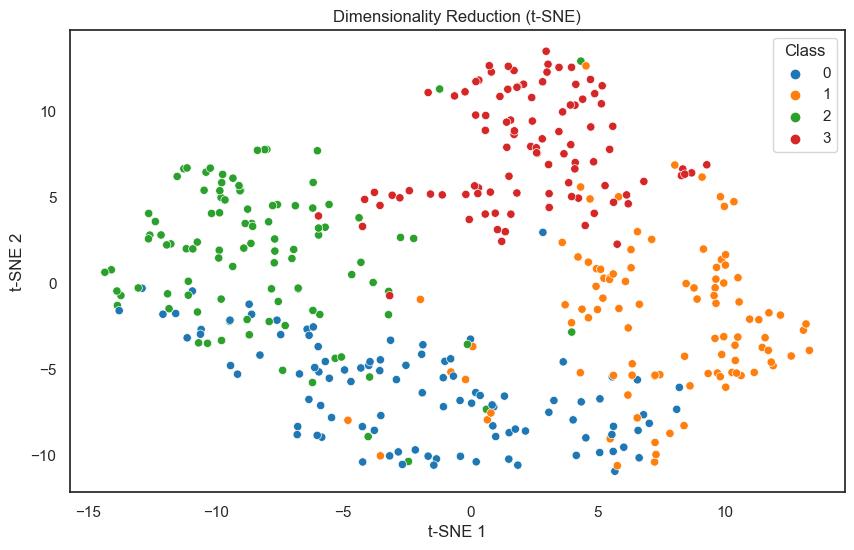

In [250]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Generate synthetic data
X, y = make_classification(n_samples=400, n_features=5, n_classes=4, n_clusters_per_class=1, random_state=42)

# Create a DataFrame
df = pd.DataFrame(X, columns=['Feature 1', 'Feature 2', 'Feature 3', 'Feature 4', 'Feature 5'])
df['Class'] = y

# Pair Plots (Scatterplot Matrix)
sns.pairplot(df, hue='Class', markers=["o", "s", "D", "P"])
plt.title('Pair Plots (Scatterplot Matrix)')
plt.show()

# Correlation Heatmap
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Box Plots
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Class', y='Feature 1')
plt.title('Box Plots')
plt.show()

# Violin Plots
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Class', y='Feature 2')
plt.title('Violin Plots')
plt.show()

# Scatterplot Matrix with Color and Shape
sns.pairplot(df, hue='Class', markers=["o", "s", "D", "P"])
plt.title('Scatterplot Matrix with Color and Shape')
plt.show()

# Parallel Coordinates Plot
plt.figure(figsize=(10, 6))
pd.plotting.parallel_coordinates(df, 'Class', colormap='viridis')
plt.title('Parallel Coordinates Plot')
plt.show()

# Dimensionality Reduction (PCA)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)
df_pca = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
df_pca['Class'] = y
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Class', palette='tab10')
plt.title('Dimensionality Reduction (PCA)')
plt.show()

# Dimensionality Reduction (t-SNE)
tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
tsne_result = tsne.fit_transform(X)
df_tsne = pd.DataFrame(data=tsne_result, columns=['t-SNE 1', 't-SNE 2'])
df_tsne['Class'] = y
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_tsne, x='t-SNE 1', y='t-SNE 2', hue='Class', palette='tab10')
plt.title('Dimensionality Reduction (t-SNE)')
plt.show()


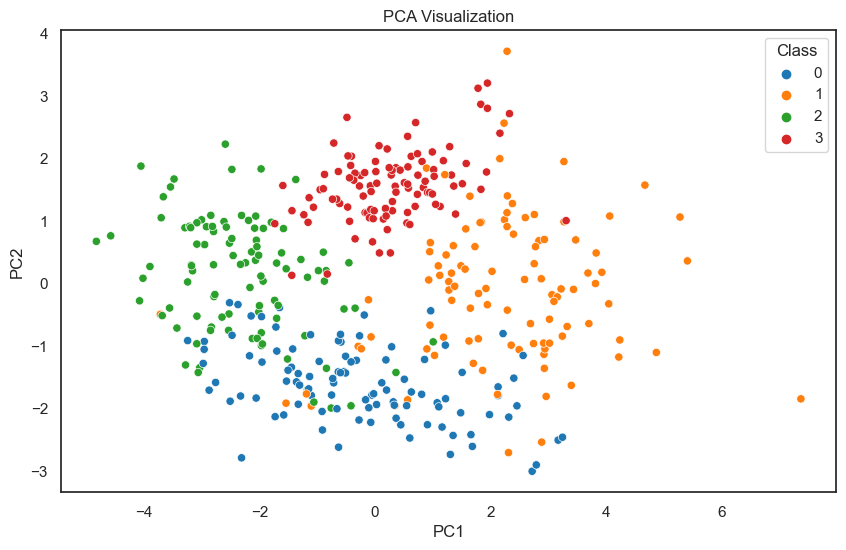

In [251]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA

# Generate synthetic data
X, y = make_classification(n_samples=400, n_features=12, n_classes=4, n_clusters_per_class=1, random_state=42)

# Create a DataFrame
feature_names = [f'Feature {i+1}' for i in range(12)]
df = pd.DataFrame(X, columns=feature_names)
df['Class'] = y

# Dimensionality Reduction (PCA)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)
df_pca = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
df_pca['Class'] = y

# Scatterplot of PCA components
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Class', palette='tab10')
plt.title('PCA Visualization')
plt.show()


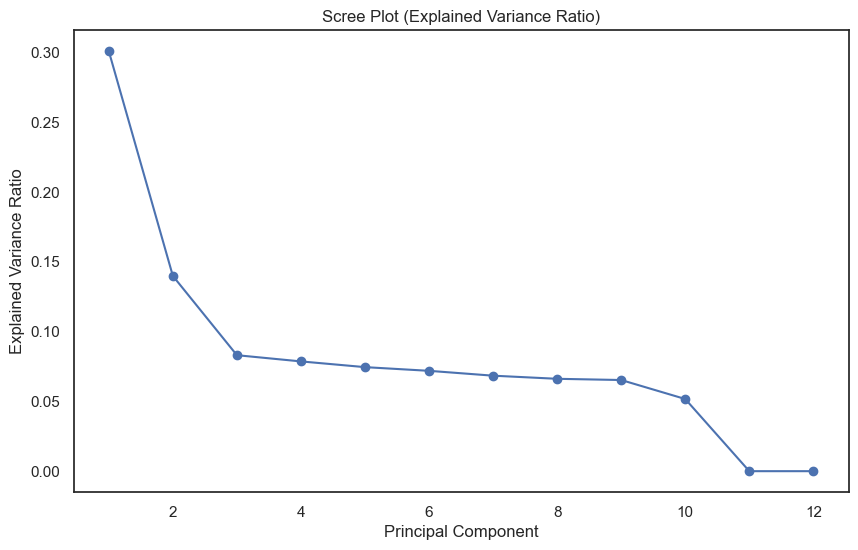

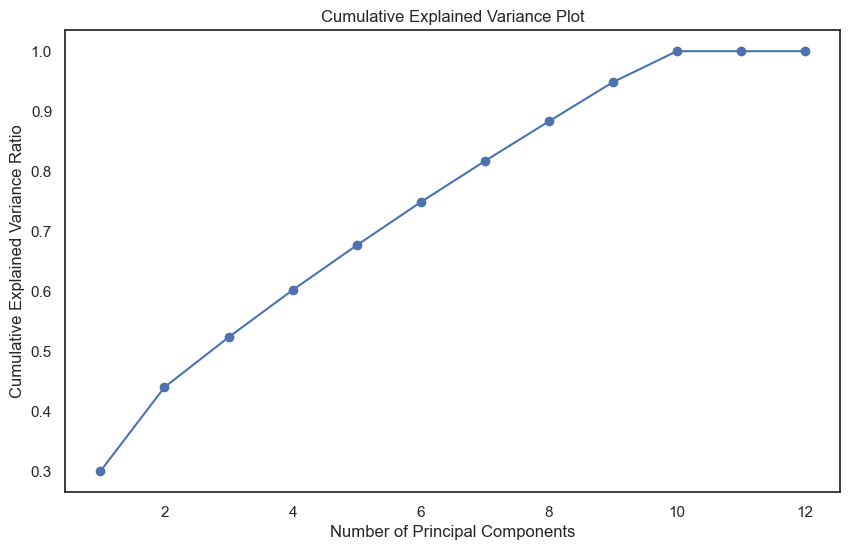

In [252]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA

# Generate synthetic data
X, y = make_classification(n_samples=400, n_features=12, n_classes=4, n_clusters_per_class=1, random_state=42)

# Create a DataFrame
feature_names = [f'Feature {i+1}' for i in range(12)]
df = pd.DataFrame(X, columns=feature_names)
df['Class'] = y

# Dimensionality Reduction (PCA)
pca = PCA(n_components=12)
pca_result = pca.fit_transform(X)
explained_var_ratio = pca.explained_variance_ratio_

# Scree Plot (explained variance ratio)
plt.figure(figsize=(10, 6))
plt.plot(range(1, 13), explained_var_ratio, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot (Explained Variance Ratio)')
plt.show()

# Cumulative Explained Variance Plot
cumulative_var_ratio = np.cumsum(explained_var_ratio)
plt.figure(figsize=(10, 6))
plt.plot(range(1, 13), cumulative_var_ratio, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Plot')
plt.show()
